# Практическая работа 1. Источники данных. Извлечение данных
## Задание 1. Работа на паре


ФИО: Башкатова Анна Денисовна

Группа: АДЭУ-201

Используем данные из открытого источника для `CSV`, `Parquet` и `API`, а также вручную подготовим данные для баз данных и HTML  из открытых данных (доступно по адресу https://data.cityofnewyork.us).

In [1]:
#import modules
import certifi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import urllib3
from urllib3 import request
from unicodedata import normalize

Файлы данных `CSV` и `Excel`

Файлы данных могут быть получены откуда угодно: от файлов, хранящихся локально на вашем устройстве, до файловых систем облачного хранилища.

Даже при работе в основном с базами данных или внешними `API` использование физических файлов — отличный способ легко использовать данные с метками времени, что может пригодиться при любых временных проблемах с подключением.

In [ ]:
# Загрузите данные с портала открытых данных Правительства Москвы —
# данные о Wi-Fi в кинотеатрах, введя в браузер следующий URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false.
# Будет загружен CSV-файл *.csv. Сохраните этот файл.
# прочитать данные CSV, используя команду Pandas pd.read_csv() в качестве df DataFrame, затем выберите первые пять строк DataFrame с помощью df.head().

**Задание 1.1.** Зайти на сайт URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false

**Задание 1.2.** Загрузить данные о `Wi-Fi в кинотеатрах` в Colab.

In [ ]:
#from google.colab import files
#uploaded = files.upload()

**Задание 1.3.** Считайте данные из файла CSV. Использовать метод `pandas read_csv` для простоты и скорости.

In [2]:
df_csv = pd.read_csv("data-60789-2024-01-24.csv", delimiter=';')
df_csv.head()

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
0,global_id,Код,Наименование кинотеатра,Административный округ,Район,Адрес,Количество точек доступа,Имя Wi-Fi сети,"Зона покрытия, в метрах",Признак функционирования,Условия доступа,Пароль,Широта в WGS-84,Долгота в WGS-84,geoData,geodata_center,NaN
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN
3,879791953,4,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Текстильщики,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.710864,37.731299,"{coordinates=[37.731299, 55.710864], type=Point}",NaN,NaN
4,879791961,7,Государственное бюджетное учреждение культуры ...,Северный административный округ,Тимирязевский район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.814406,37.571210,"{coordinates=[37.57121, 55.814406], type=Point}",NaN,NaN


**Задание 1.4.** Так как первая строка включает определение столбцов, удалить строку с `index=0`.

In [3]:
data = df_csv.drop(df_csv.index[0])

In [4]:
data

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN
3,879791953,4,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Текстильщики,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.710864,37.731299,"{coordinates=[37.731299, 55.710864], type=Point}",NaN,NaN
4,879791961,7,Государственное бюджетное учреждение культуры ...,Северный административный округ,Тимирязевский район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.814406,37.571210,"{coordinates=[37.57121, 55.814406], type=Point}",NaN,NaN
5,879791967,9,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,район Свиблово,"Российская Федерация, город Москва, внутригоро...",5,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.851945,37.647549,"{coordinates=[37.647549, 55.851945], type=Point}",NaN,NaN
6,879795206,2,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Бабушкинский район,"Российская Федерация, город Москва, внутригоро...",5,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.861974,37.676825,"{coordinates=[37.676825, 55.861974], type=Point}",NaN,NaN
7,879795207,5,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Лефортово,"Российская Федерация, город Москва, внутригоро...",4,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.764303,37.705508,"{coordinates=[37.705508, 55.764303], type=Point}",NaN,NaN
8,879795208,6,Государственное бюджетное учреждение культуры ...,Юго-Западный административный округ,Академический район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.682787,37.571585,"{coordinates=[37.571585, 55.682787], type=Point}",NaN,NaN
9,879795209,8,Государственное бюджетное учреждение культуры ...,Восточный административный округ,район Новогиреево,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.749841,37.802562,"{coordinates=[37.802562, 55.749841], type=Point}",NaN,NaN
10,879795211,10,Государственное бюджетное учреждение культуры ...,Юго-Западный административный округ,Обручевский район,"Российская Федерация, город Москва, внутригоро...",5,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.665309,37.513395,"{coordinates=[37.513395, 55.665309], type=Point}",NaN,NaN


# Визуализация

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 1 to 11
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   global_id             11 non-null     object 
 1   ID                    11 non-null     object 
 2   CinemaName            11 non-null     object 
 3   AdmArea               11 non-null     object 
 4   District              11 non-null     object 
 5   Address               11 non-null     object 
 6   NumberOfAccessPoints  11 non-null     object 
 7   WiFiName              11 non-null     object 
 8   CoverageArea          11 non-null     object 
 9   FunctionFlag          11 non-null     object 
 10  AccessFlag            11 non-null     object 
 11  Password              0 non-null      object 
 12  Latitude_WGS84        11 non-null     object 
 13  Longitude_WGS84       11 non-null     object 
 14  geoData               11 non-null     object 
 15  geodata_center        0 n

Рассмотрим количество точек доступа по округам

In [6]:
data['NumberOfAccessPoints'] = pd.to_numeric(data['NumberOfAccessPoints'], errors='coerce').astype('Int64')
pivot_table = pd.pivot_table(data, index='AdmArea', values='NumberOfAccessPoints', aggfunc='sum')
pivot_table_df = pivot_table.reset_index()
pivot_table_df

,AdmArea,NumberOfAccessPoints
0,Восточный административный округ,6
1,Северный административный округ,3
2,Северо-Восточный административный округ,17
3,Юго-Восточный административный округ,21
4,Юго-Западный административный округ,8


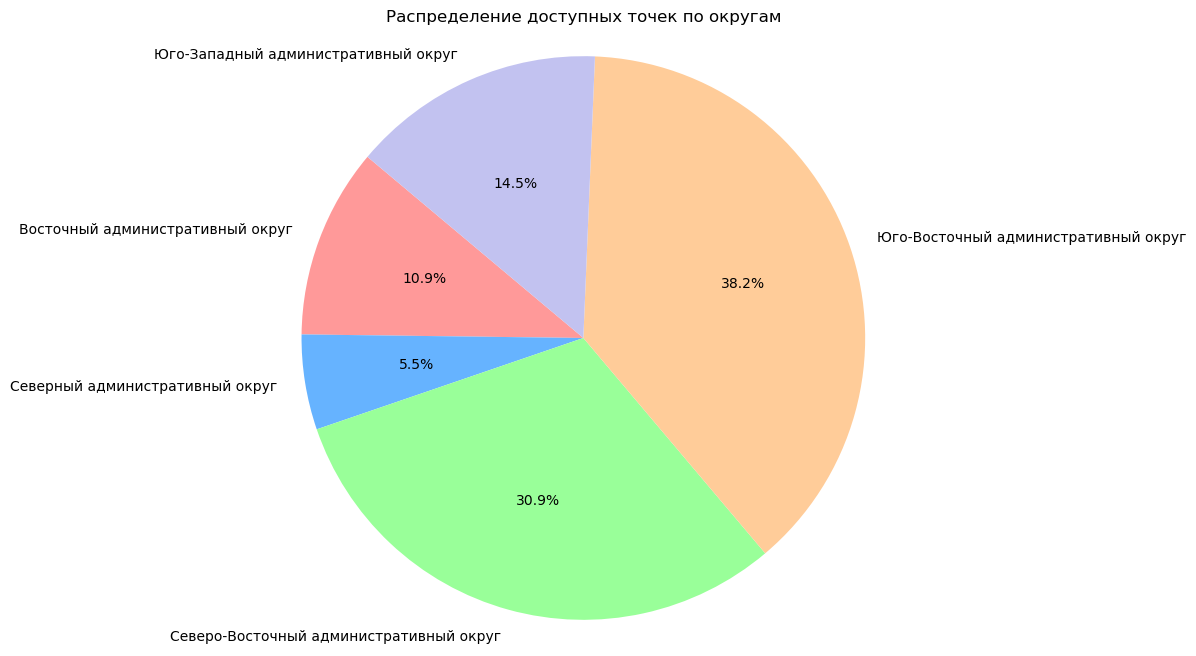

In [7]:
plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
plt.pie(pivot_table_df['NumberOfAccessPoints'], labels=pivot_table_df['AdmArea'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Распределение доступных точек по округам')
plt.show()

# **Задание 1.5.** Выполнить парсинг веб-страницы с помощью `JSON`

In [8]:
#Импорт стандартных пакетов
import pandas as pd

#Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint

#Для выполнения операций с регулярными выражениями
import re

In [9]:
#используем идентификатор набора данных: 60789, а также свой код api
response = reqs.request(method='GET', url='https://apidata.mos.ru/v1/datasets/60789/features?api_key=079dd1c5-bbd2-4db8-8419-2ae029f87ac8')
json_page = response.json()

## <font color='blue'>Парсинг веб-страниц с помощью JSON</font>

### <font color="green"> Что такое JSON?</font>

* JSON (нотация объектов JavaScript) — популярный формат данных, используемый для представления структурированных данных.
* Это текстовый формат, который не зависит от языка и может использоваться в Python, Perl и других языках.
* Формат JSON используется для передачи данных между серверами и веб-приложениями.
* Он построен на двух структурах:

      - Коллекция пар имя/значение. Это реализуется как объект, запись, словарь, хеш-таблица, список ключей или ассоциативный массив.
      - Упорядоченный список значений. Это реализуется как массив, вектор, список или последовательность.
     
     
Основные функции `JSON`:

* `dump()`: запись закодированной строки в файл.
* `load()`: декодирование во время чтения файла JSON.
* `dumps()`: кодирование в объекты JSON.
* `loads()`: декодирует строку JSON.

### <font color="green"> Сериализация и десериализация</font>

> … процесс перевода структур данных или состояния объекта в формат, который можно сохранить… или передать… и позже восстановить (возможно, в другой компьютерной среде). (Википедия)

* **Сериализация** — это процесс преобразования объектов или структур данных в потоки байтов или строки.
* Эти потоки байтов затем можно легко сохранить или передать.
* Это позволяет разработчикам сохранять, например, данные конфигурации или прогресс пользователя, а затем сохранять их (на диске или в базе данных) или отправлять в другое место.
* Обратный процесс сериализации известен как **десериализация**.

### Зачем нужна сериализация?

Нам нужна сериализация по следующим причинам:

- **Связь**: Сериализация включает в себя процедуру сериализации и передачи объекта. Это позволяет нескольким компьютерным системам одновременно проектировать, совместно использовать и выполнять объекты.
- **Кэширование**: время, затрачиваемое на создание объекта, больше времени, необходимого для его десериализации. Сериализация минимизирует затраты времени за счет кэширования гигантских объектов.
- **Глубокое копирование**: процесс клонирования упрощается благодаря сериализации. Точная копия объекта получается путем сериализации объекта в массив байтов и последующей его десериализации.
- **Переносимость**. Основное преимущество сериализации заключается в том, что она работает в разных архитектурах и операционных системах.
- **Постоянство**: состояние любого объекта можно сохранить напрямую, применив к нему сериализацию, и сохранить в базе данных, чтобы его можно было получить позже.

**Сериализация**

Мы используем функцию dump(), которая принимает два аргумента:
* Объект данных, подлежащий сериализации.
* Объект файла, в который он будет записан (байтовый формат).

In [10]:
file_name = "Sample.json"
with open(file_name, "w") as fid:
    json.dump(json_page, fid)

In [11]:
with open(file_name, 'r') as file:
    data = json.load(file)
data

{'features': [{'geometry': {'coordinates': [37.636778, 55.818675],
    'type': 'Point'},
   'properties': {'datasetId': 60789,
    'attributes': {'is_deleted': 0,
     'ID': 1,
     'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»',
     'AdmArea': 'Северо-Восточный административный округ',
     'District': 'Останкинский район',
     'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109',
     'NumberOfAccessPoints': 7,
     'WiFiName': 'Moscow_WiFi_Free',
     'CoverageArea': 50,
     'FunctionFlag': 'действует',
     'AccessFlag': 'открытая сеть',
     'Password': '',
     'Latitude_WGS84': '55.818675',
     'Longitude_WGS84': '37.636778',
     'global_id': 879791944},
    'rowId': None,
    'versionNumber': 1,
    'releaseNumber': 32},
   'type': 'Feature'},
  {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'},
   'pr

**Десериализация JSON**

* Десериализация противоположна сериализации, т. е. преобразованию объекта JSON в соответствующие объекты Python.
* Мы используем функцию load(), которая обычно используется для загрузки из строки, в противном случае корневой объект находится в списке или диктовке.

In [12]:
with open(file_name, "r") as fid:
     json_obj = json.load(fid)

print(json_obj)

{'features': [{'geometry': {'coordinates': [37.636778, 55.818675], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 1, 'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Останкинский район', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109', 'NumberOfAccessPoints': 7, 'WiFiName': 'Moscow_WiFi_Free', 'CoverageArea': 50, 'FunctionFlag': 'действует', 'AccessFlag': 'открытая сеть', 'Password': '', 'Latitude_WGS84': '55.818675', 'Longitude_WGS84': '37.636778', 'global_id': 879791944}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 32}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 3, 'CinemaName': 'Государственн

In [51]:
for key in json_obj:
    print("{:>12}: {}".format(key, json_obj[key]))

    features: [{'geometry': {'coordinates': [37.636778, 55.818675], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 1, 'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Останкинский район', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109', 'NumberOfAccessPoints': 7, 'WiFiName': 'Moscow_WiFi_Free', 'CoverageArea': 50, 'FunctionFlag': 'действует', 'AccessFlag': 'открытая сеть', 'Password': '', 'Latitude_WGS84': '55.818675', 'Longitude_WGS84': '37.636778', 'global_id': 879791944}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 32}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 3, 'CinemaName': 'Государствен

Обрабатываем данные с помощью `JSON`:

In [13]:
import requests
api_url='https://apidata.mos.ru/v1/datasets/60789/features?api_key=079dd1c5-bbd2-4db8-8419-2ae029f87ac8'
response = requests.get(api_url)

In [14]:
if response.status_code == 200:
   json_page = json.loads(response.text)

**Задание 1.6.** Выполнить парсинг веб-страницы с помощью `JSON`. Получите URL-адрес:

In [15]:
print(f"URL: \n\t {response.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/60789/features?api_key=079dd1c5-bbd2-4db8-8419-2ae029f87ac8


**Задание 1.7.** Выполнить парсинг веб-страницы с помощью `JSON`. Определите тип контента:

In [16]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 application/json


**Задание 1.8.** Выполнить парсинг веб-страницы с помощью `JSON`. Обработайте данные с помощью JSON:

In [17]:
if response.status_code == 200:
   json_page = json.loads(response.text)

**Задание 1.9.**  Обработайте данные с помощью `JSON`. Посмотреть на ключи:

In [18]:
for x in json_page:
    print(x)

features
type


Распечатать ключи и значения:

In [19]:
for x in json_page:
    print(f"{x} --> {json_page[x]} \n")

features --> [{'geometry': {'coordinates': [37.636778, 55.818675], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 1, 'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Останкинский район', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109', 'NumberOfAccessPoints': 7, 'WiFiName': 'Moscow_WiFi_Free', 'CoverageArea': 50, 'FunctionFlag': 'действует', 'AccessFlag': 'открытая сеть', 'Password': '', 'Latitude_WGS84': '55.818675', 'Longitude_WGS84': '37.636778', 'global_id': 879791944}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 32}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 3, 'CinemaName': 'Государственн

In [20]:
pprint.pprint(json_page)

{'features': [{'geometry': {'coordinates': [37.636778, 55.818675],
                            'type': 'Point'},
               'properties': {'attributes': {'AccessFlag': 'открытая сеть',
                                             'Address': 'Российская Федерация, '
                                                        'город Москва, '
                                                        'внутригородская '
                                                        'территория '
                                                        'муниципальный округ '
                                                        'Останкинский, '
                                                        'проспект Мира, дом '
                                                        '109',
                                             'AdmArea': 'Северо-Восточный '
                                                        'административный '
                                                        'округ',
  

# **Задание 1.10.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`

 <font color='blue'>Парсинг веб-страниц с помощью Beautiful Soup</font>

- Веб-скрапинг позволяет загрузить HTML-код веб-сайта и извлечь необходимые вам данные.
- Beautiful Soup — это библиотека Python для очистки данных с веб-сайтов.
- Beautiful Soup создает дерево разбора из проанализированных документов HTML и XML.

In [22]:
from bs4 import BeautifulSoup as bso

In [23]:
#Отправление запроса на получение данных и присваивание ответ переменной.
source = reqs.get('https://data.mos.ru/opendata/60789?pageSize=10&pageIndex=0&version=1&release=32')

In [24]:
import chardet
source.encoding = chardet.detect(source.content)['encoding']

In [25]:
print(f"Content type: \n\t {source.headers['content-type']}")

Content type: 
	 text/html


In [26]:
print(source)

<Response [200]>


**Задание 1.10.1.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Создать beautiful soup объект.

In [27]:
mysoup = bso(source.text, 'html.parser', from_encoding='utf-8')

C:\Users\Bashk\anaconda3\lib\site-packages\bs4\__init__.py:226: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


**Задание 1.10.2.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Распечатайте HTML-содержимое страницы, используя метод prettify

In [28]:
print(mysoup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="assets/svg/logo.svg" rel="shortcut icon" type="image/x-icon"/>
  <meta content="nyN3q18qWqaEqyyM32j8Pg-IJiGcYg9B9RWEd1OZ0mw" name="google-site-verification"/>
  <meta content="a63f7d345486875f" name="yandex-verification"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="6edef17ca091babbc2d8b555533b8ada" name="wmail-verification"/>
  <title>
   Портал открытых данных правительства Москвы
  </title>
  <base href="/"/>
  <style>
   .mat-typography{font:400 14px/20px Roboto,Helvetica Neue,sans-serif;letter-spacing:normal}@charset "UTF-8";:root{--white-100-color:#000000;--white-72-color:#474747;--white-56-color:#707070;--white-24-color:#c2c2c2;--white-12-color:#e0e0e0;--white-0-color:#ffffff;--black-100-color:#ffffff;--black-72-color:#e0e0e0;--black-56-color:#c2c2c2;--black-24-color:#707070;--black-12-color:#474747;--black-0-color:#

**Задание 1.10.3.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Получить заголовок страницы

In [29]:
print(mysoup.title)

<title>Портал открытых данных правительства Москвы</title>


# Получение данных из таблиц РСУБД

In [ ]:
#from google.colab import files
#uploaded = files.upload()

**Задание 1.11.** Считать результаты запроса sqlite в DataFrame pandas

In [30]:
#Считываем результаты запроса sqlite в DataFrame pandas
with sqlite3.connect("movies.sqlite") as conn:
    df_rsubd = pd.read_sql("SELECT * from movies", conn)
df_rsubd.head(20)

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766
5,43602,Spider-Man 3,258000000,115,2007-05-01,890871626,Spider-Man 3,5.9,3576,The seemingly invincible Spider-Man goes up ag...,The battle within.,559,4767
6,43603,Tangled,260000000,48,2010-11-24,591794936,Tangled,7.4,3330,When the kingdom's most wanted-and most charmi...,They're taking adventure to new lengths.,38757,4768
7,43604,Avengers: Age of Ultron,280000000,134,2015-04-22,1405403694,Avengers: Age of Ultron,7.3,6767,When Tony Stark tries to jumpstart a dormant p...,A New Age Has Come.,99861,4769
8,43605,Harry Potter and the Half-Blood Prince,250000000,98,2009-07-07,933959197,Harry Potter and the Half-Blood Prince,7.4,5293,"As Harry begins his sixth year at Hogwarts, he...",Dark Secrets Revealed,767,4770
9,43606,Batman v Superman: Dawn of Justice,250000000,155,2016-03-23,873260194,Batman v Superman: Dawn of Justice,5.7,7004,Fearing the actions of a god-like Super Hero l...,Justice or revenge,209112,4771


# Визуализация данных  из таблиц РСУБД

In [31]:
df_rsubd = df_rsubd.dropna()

In [32]:
df_rsubd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3951 entries, 0 to 4771
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3951 non-null   int64  
 1   original_title  3951 non-null   object 
 2   budget          3951 non-null   int64  
 3   popularity      3951 non-null   int64  
 4   release_date    3951 non-null   object 
 5   revenue         3951 non-null   int64  
 6   title           3951 non-null   object 
 7   vote_average    3951 non-null   float64
 8   vote_count      3951 non-null   int64  
 9   overview        3951 non-null   object 
 10  tagline         3951 non-null   object 
 11  uid             3951 non-null   int64  
 12  director_id     3951 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 432.1+ KB


In [33]:
import pandas as pd
#преобразовываем столбец 'date' в тип datetime
df_rsubd['release_date'] = pd.to_datetime(df_rsubd['release_date'])
#новый столбец 'year', содержащий только год из столбца 'date'
df_rsubd['year'] = df_rsubd['release_date'].dt.year
df_rsubd

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id,year
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762,2009
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763,2007
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764,2015
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765,2012
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4765,48392,Bang,0,0,1995-09-09,0,Bang,6.0,1,A young woman in L.A. is having a bad day: she...,Sometimes you've got to break the rules,124606,7105,1995
4766,48393,Primer,7000,23,2004-10-08,424760,Primer,6.9,658,Friends/fledgling entrepreneurs invent a devic...,What happens if it actually works?,14337,7106,2004
4768,48395,El Mariachi,220000,14,1992-09-04,2040920,El Mariachi,6.6,238,El Mariachi just wants to play his guitar and ...,"He didn't come looking for trouble, but troubl...",9367,5097,1992
4769,48396,Newlyweds,9000,0,2011-12-26,0,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,72766,6485,2011


In [37]:
pivot_table111 = df_rsubd.pivot_table(index='year', values=['revenue'], aggfunc='sum')
df_from_pivot1 = pivot_table111.reset_index()
df_from_pivot1.head(4)

,year,revenue
0,1916,8394751
1,1927,650422
2,1929,4358000
3,1930,8000000


In [38]:
#по убыванию
df_from_pivot1_sorted = df_from_pivot1.sort_values(by='revenue', ascending=False)
#топ 20 по макс.выручке
top_20_revenue = df_from_pivot1_sorted.head(10)
top_20_revenue

,year,revenue
84,2014,23623663447
82,2012,23591381664
83,2013,22827986027
85,2015,22320727767
80,2010,20185071067
81,2011,19892138175
79,2009,19623740656
78,2008,17762144263
77,2007,16366778534
74,2004,16017209168


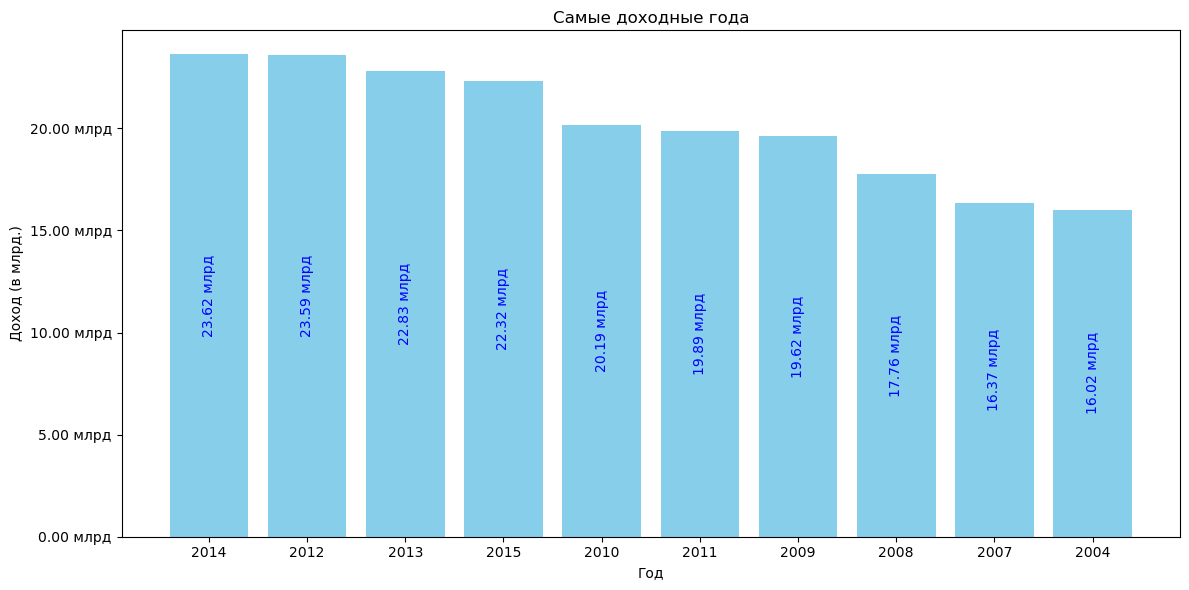

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#cортировка по выручке
top_20_revenue_sorted = top_20_revenue.sort_values(by='revenue', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_20_revenue_sorted)), top_20_revenue_sorted['revenue'] / 1000000000, color='skyblue')  # Делим на 1 млрд для отображения в миллиардах

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, '{:.2f} млрд'.format(height), ha='center', va='center', color='blue', rotation=90)

plt.xlabel('Год')
plt.ylabel('Доход (в млрд.)')
plt.title('Самые доходные года')
plt.xticks(range(len(top_20_revenue_sorted)), top_20_revenue_sorted['year'], rotation=0)

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.2f} млрд'))
plt.tight_layout()
plt.show()

# Получение данных `Parquet`

Посетите URL https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page.

In [ ]:
#from google.colab import files
#uploaded = files.upload()

**Задание 1.12.** Считайте данные из файла Parquet. Использовать метод pandas read_parquet.

In [40]:
df_parquet = pd.read_parquet(r"D:\Ubuntu\yellow_tripdata_2023-03.parquet")
df_parquet.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


# Визуализации данных Parquet

In [41]:
df_parquet.info(null_counts=True)

C:\Users\Bashk\AppData\Local\Temp\ipykernel_18888\2893779666.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_parquet.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3403766 entries, 0 to 3403765
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               3403766 non-null  int32         
 1   tpep_pickup_datetime   3403766 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  3403766 non-null  datetime64[ns]
 3   passenger_count        3316147 non-null  float64       
 4   trip_distance          3403766 non-null  float64       
 5   RatecodeID             3316147 non-null  float64       
 6   store_and_fwd_flag     3316147 non-null  object        
 7   PULocationID           3403766 non-null  int32         
 8   DOLocationID           3403766 non-null  int32         
 9   payment_type           3403766 non-null  int64         
 10  fare_amount            3403766 non-null  float64       
 11  extra                  3403766 non-null  float64       
 12  mta_tax                34037

In [42]:
df = df_parquet.dropna()

In [43]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06,3.316147e+06
mean,1.723006e+00,1.351417e+00,3.480871e+00,1.623961e+00,1.655044e+02,1.642658e+02,1.218681e+00,1.883897e+01,1.666549e+00,4.871644e-01,3.493406e+00,5.684248e-01,9.810438e-01,2.775532e+01,2.275176e+00,1.040236e-01
std,4.475136e-01,8.861919e-01,2.861328e+01,7.358691e+00,6.346767e+01,6.963775e+01,5.037901e-01,1.833955e+01,1.848126e+00,1.032037e-01,4.013593e+00,2.126436e+00,1.907902e-01,2.298060e+01,7.745563e-01,3.503260e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.599000e+02,-7.500000e+00,-5.000000e-01,-8.000000e+01,-7.330000e+01,-1.000000e+00,-9.829500e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.560000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.770000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.052000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.310000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.120000e+01,2.500000e+00,5.000000e-01,4.340000e+00,0.000000e+00,1.000000e+00,2.964000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,9.000000e+00,1.425791e+04,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,2.100000e+03,1.375000e+01,4.000000e+00,9.843000e+02,1.770000e+02,1.000000e+00,2.100000e+03,2.500000e+00,1.250000e+00


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316147 entries, 0 to 3316146
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [45]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.00
6,1,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,1.0,N,170,48,1,12.1,3.5,0.5,3.40,0.0,1.0,20.50,2.5,0.00
7,1,2023-03-01 00:45:12,2023-03-01 00:52:37,1.0,2.00,1.0,N,48,164,2,10.7,3.5,0.5,0.00,0.0,1.0,15.70,2.5,0.00
8,1,2023-03-01 00:19:43,2023-03-01 00:39:37,1.0,5.30,1.0,N,113,61,1,26.1,3.5,0.5,9.30,0.0,1.0,40.40,2.5,0.00
9,2,2023-03-01 00:08:42,2023-03-01 00:18:45,1.0,2.27,1.0,N,239,263,1,13.5,1.0,0.5,3.70,0.0,1.0,22.20,2.5,0.00


In [46]:
pivot_table = df.pivot_table(index='passenger_count', values=['tip_amount'], aggfunc='mean')
df_from_pivot = pivot_table.reset_index()
df_from_pivot

,passenger_count,tip_amount
0,0.0,3.037435
1,1.0,3.454632
2,2.0,3.736530
3,3.0,3.563852
4,4.0,3.480189
5,5.0,3.484336
6,6.0,3.521457
7,7.0,5.671429
8,8.0,6.420909
9,9.0,40.083333


In [47]:
df_from_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  10 non-null     float64
 1   tip_amount       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


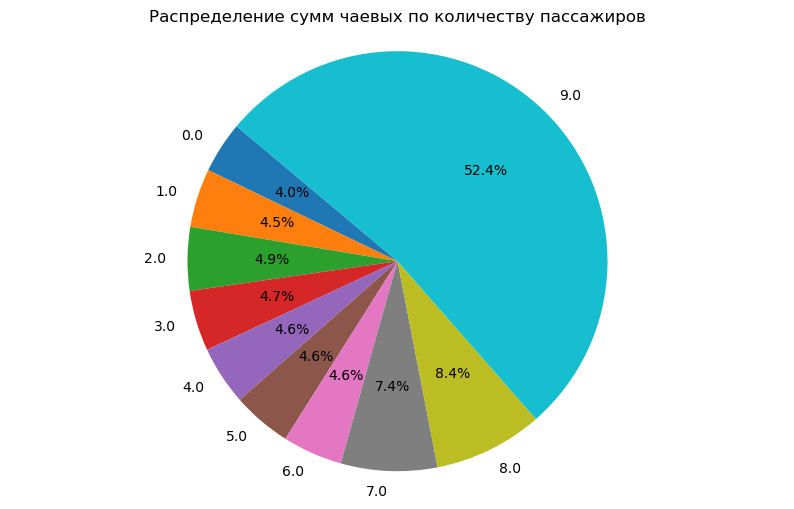

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.pie(df_from_pivot['tip_amount'], labels=df_from_pivot['passenger_count'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Распределение сумм чаевых по количеству пассажиров')

plt.show()